In [70]:
# loading 5 files into dataframes

import pandas as pd
df1=pd.read_csv('1990-1999.csv')
df2=pd.read_csv('2000-2012.csv')
df3=pd.read_csv('2012-2014.csv')
df4=pd.read_csv('2015-2016.csv')
df5=pd.read_csv('2017-onwards.csv')

In [71]:
# combining the files into 1 dataframe

df = pd.concat([df1,df2,df3,df4,df5],axis=0)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
165386,2023-11,YISHUN,4 ROOM,865,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months
165387,2023-11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years
165388,2023-11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months
165389,2023-11,YISHUN,5 ROOM,232,YISHUN ST 21,04 TO 06,121.0,Improved,1985,580000.0,60 years 09 months


In [3]:
# Separating year and month from month column

df['year']=df['month'].apply(lambda x:int(x[0:4]))

In [4]:
df['month']=df['month'].apply(lambda x:int(x[5:]))
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
165386,11,YISHUN,4 ROOM,865,YISHUN ST 81,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months,2023
165387,11,YISHUN,5 ROOM,315C,YISHUN AVE 9,04 TO 06,112.0,Improved,2015,645000.0,91 years,2023
165388,11,YISHUN,5 ROOM,342C,YISHUN RING RD,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months,2023
165389,11,YISHUN,5 ROOM,232,YISHUN ST 21,04 TO 06,121.0,Improved,1985,580000.0,60 years 09 months,2023


In [13]:
# performing chisquared test between block and street_name
# null hypothesis is that the features are independent
# we got very less value of p ie null hypothesis will be rejected i.e.
# the features are highly dependent

import scipy.stats as stats
table=pd.crosstab(df['block'],df['street_name'])
val=stats.chi2_contingency(table)
print(val.pvalue)

0.0


In [14]:
# town and block are also higly dependent so we will keep one

import scipy.stats as stats
table=pd.crosstab(df['block'],df['town'])
val=stats.chi2_contingency(table)
print(val.pvalue)

0.0


In [22]:
len(df['street_name'].unique())

582

In [23]:
len(df['town'].unique())

27

In [24]:
len(df['block'].unique())

2690

In [37]:
# removing town & block and one hot encoding street_name

df = df.drop(['block'],axis=1)
df = df.drop(['town'],axis=1)
df=pd.concat([df,pd.get_dummies(df.street_name)],axis=1)
df=df.drop('street_name',axis=1)
df

,month,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,ADMIRALTY DR,...,YISHUN ST 72,YISHUN ST 81,YUAN CHING RD,YUNG AN RD,YUNG HO RD,YUNG KUANG RD,YUNG LOH RD,YUNG PING RD,YUNG SHENG RD,ZION RD
0,1,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1 ROOM,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1 ROOM,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3 ROOM,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,11,4 ROOM,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months,2023,False,...,False,True,False,False,False,False,False,False,False,False
165387,11,5 ROOM,04 TO 06,112.0,Improved,2015,645000.0,91 years,2023,False,...,False,False,False,False,False,False,False,False,False,False
165388,11,5 ROOM,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months,2023,False,...,False,False,False,False,False,False,False,False,False,False
165389,11,5 ROOM,04 TO 06,121.0,Improved,1985,580000.0,60 years 09 months,2023,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [39]:
# one hot encoding flat_type

df=pd.concat([df,pd.get_dummies(df.flat_type)],axis=1)
df=df.drop('flat_type',axis=1)
df

,month,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,ADMIRALTY DR,ADMIRALTY LINK,...,YUNG SHENG RD,ZION RD,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION,MULTI-GENERATION
0,1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,11,04 TO 06,104.0,Model A,1988,520000.0,63 years 05 months,2023,False,False,...,False,False,False,False,False,True,False,False,False,False
165387,11,04 TO 06,112.0,Improved,2015,645000.0,91 years,2023,False,False,...,False,False,False,False,False,False,True,False,False,False
165388,11,13 TO 15,113.0,Premium Apartment,2016,700000.0,91 years 03 months,2023,False,False,...,False,False,False,False,False,False,True,False,False,False
165389,11,04 TO 06,121.0,Improved,1985,580000.0,60 years 09 months,2023,False,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [43]:
# taking average of the range of storey

df['storey_range']=df['storey_range'].apply(lambda x:(int(x[0:2])+int(x[-2:]))/2)
df

,month,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,ADMIRALTY DR,ADMIRALTY LINK,...,YUNG SHENG RD,ZION RD,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION,MULTI-GENERATION
0,1,11.0,31.0,IMPROVED,1977,9000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1,5.0,31.0,IMPROVED,1977,6000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
2,1,11.0,31.0,IMPROVED,1977,8000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,8.0,31.0,IMPROVED,1977,6000.0,NaN,1990,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,5.0,73.0,NEW GENERATION,1976,47200.0,NaN,1990,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,11,5.0,104.0,Model A,1988,520000.0,63 years 05 months,2023,False,False,...,False,False,False,False,False,True,False,False,False,False
165387,11,5.0,112.0,Improved,2015,645000.0,91 years,2023,False,False,...,False,False,False,False,False,False,True,False,False,False
165388,11,14.0,113.0,Premium Apartment,2016,700000.0,91 years 03 months,2023,False,False,...,False,False,False,False,False,False,True,False,False,False
165389,11,5.0,121.0,Improved,1985,580000.0,60 years 09 months,2023,False,False,...,False,False,False,False,False,False,True,False,False,False


In [44]:
# confirming data type of floor_area

df['floor_area_sqm'].info()

<class 'pandas.core.series.Series'>
Index: 911594 entries, 0 to 165390
Series name: floor_area_sqm
Non-Null Count   Dtype  
--------------   -----  
911594 non-null  float64
dtypes: float64(1)
memory usage: 13.9 MB


In [45]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [46]:
# one hot encoding flat_model

df=pd.concat([df,pd.get_dummies(df.flat_model)],axis=1)
df=df.drop('flat_model',axis=1)
df

,month,storey_range,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,ADMIRALTY DR,ADMIRALTY LINK,AH HOOD RD,...,Premium Apartment Loft,Premium Maisonette,SIMPLIFIED,STANDARD,Simplified,Standard,TERRACE,Terrace,Type S1,Type S2
0,1,11.0,31.0,1977,9000.0,NaN,1990,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,5.0,31.0,1977,6000.0,NaN,1990,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,11.0,31.0,1977,8000.0,NaN,1990,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,8.0,31.0,1977,6000.0,NaN,1990,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,5.0,73.0,1976,47200.0,NaN,1990,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165386,11,5.0,104.0,1988,520000.0,63 years 05 months,2023,False,False,False,...,False,False,False,False,False,False,False,False,False,False
165387,11,5.0,112.0,2015,645000.0,91 years,2023,False,False,False,...,False,False,False,False,False,False,False,False,False,False
165388,11,14.0,113.0,2016,700000.0,91 years 03 months,2023,False,False,False,...,False,False,False,False,False,False,False,False,False,False
165389,11,5.0,121.0,1985,580000.0,60 years 09 months,2023,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# lease_commence_date and remaining lease has a direct correlation, so dropping remaining_lease

df['lease_commence_date'].info()
df=df.drop('remaining_lease',axis=1)

<class 'pandas.core.series.Series'>
Index: 911594 entries, 0 to 165390
Series name: lease_commence_date
Non-Null Count   Dtype
--------------   -----
911594 non-null  int64
dtypes: int64(1)
memory usage: 13.9 MB


In [49]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 911594 entries, 0 to 165390
Series name: year
Non-Null Count   Dtype
--------------   -----
911594 non-null  int64
dtypes: int64(1)
memory usage: 13.9 MB


In [52]:
# defining dependent and independent variables

y=df['resale_price']
x=df.drop('resale_price',axis=1)

In [53]:
# importing necesssary libraries and splitting data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [54]:
# trying gradient boosting regressor

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(max_depth=15)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

0.9643885257161255
20961.403685266425


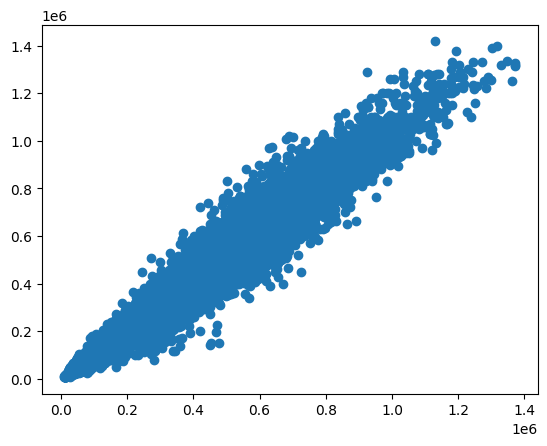

In [55]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)